## Types of statistics
**1. Descriptive statistics:** It is a branch of statistics that involves organizing, displaying, and describing data. It deals with numbers
(numerical facts, figures, or information) to describe any phenomena which can be referred to as descriptive statistics.

**2. Inferential statistics:** It is a branch of statistics that involves drawing conclusions about a population based on the information obtained
from a sample taken from that population.

**3. Predictive statistics** It is defined as the science of extracting information from data and using 
them to predict trends, behavior patterns,
or relationships between characteristics.

## Types of data
**1. Categorical data:** gender, diseases, marital status,..

**2. Numerical data:** ex: age, height, weight,..

## Types of numerical data
**1. Discrete data:** numder of people, number of product reviews, number of items bought in store

**2. Continuous data:** height, weight, temperature

## Qualitative and Quantitative data
**1. Qualitative data**
Non-numeric information such as customer preferences and types of faults in a tennis player. 

**2. Quantitative data**
Numerical data such as number of seats and number of patients.

## Tests:

**Z-Test**
* Large samples (n>30)
* Testing hypotheses about population means or proportions
* Known population standard deviation

**T-Test**
* Small sample size (n < 30)
* Unknown population standard deviation

**Chi-Square**
* Used for categorical data and testing the association or independence between categorical variables.

In [42]:
import numpy as np
import statistics

x = np.array([1,2,3,4,7,7,8])
#mean: sum of data/ total n
print(f"The mean of x is",statistics.mean(x))
#mode: the value that appears most frequently in a data set
print(f"The mode of x is",statistics.mode(x))
#median: the value in the middle
print(f"The median of x is",statistics.median(x))
#standard deviation
print(f"The standard deviation of x is",statistics.stdev(x))
#variance
print(f"The variance of x is",statistics.variance(x))

The mean of x is 4
The mode of x is 7
The median of x is 4
The standard deviation of x is 2.6457513110645907
The variance of x is 7


## Skewness
* Skewness is the amount and direction of departure from horizontal symmetry. Any distribution is symmetric if the left and right of the
center point look the same.
* It is important to understand skewness because it improves the linear models used.

In [43]:
from statsmodels.stats.stattools import medcouple
from statsmodels.stats.stattools import robust_skewness

skewness = medcouple(x)
skewness

array(0.2)

## Kurtosis
* Kurtosis is the second measure of shape. It measures how heavy-tailed or light-tailed the distribution is relative to a normal distribution.
Data with high kurtosis tend to have heavy tails or outliers. If the kurtosis is low, there will be no outliers. A uniform distribution is an
extreme case of low kurtosis

In [44]:
from statsmodels.stats.stattools import robust_kurtosis

kurtosis = robust_kurtosis(x)
kurtosis

(-1.5919140625000003,
 -0.6775395599296616,
 -1.2727271228708026,
 -1.4169580627812752)

## Covariance and Correlation
* Covariance and correlation measure the relationship and dependency between two variables. While covariance gives the direction of the
linear relationship, correlation gives both direction and strength.Therefore, correlation is a function of covariance. Furthermore, correlation
values are standardized while covariance values are not.

In [45]:
import pandas as pd
df = pd.DataFrame({"X":[0,1,2,3,4,5,9],
                   "Y":[11,4,7,3,5,7,8],
                   "z":[2,6,7,3,5,4,4]})
print(df.cov())

          X         Y         z
X  8.952381 -0.047619 -0.214286
Y -0.047619  7.285714 -1.714286
z -0.214286 -1.714286  2.952381


The positive value denotes that both the variables move in the same direction.

In [46]:
print(df.corr())

          X         Y         z
X  1.000000 -0.005896 -0.041681
Y -0.005896  1.000000 -0.369625
z -0.041681 -0.369625  1.000000


The closer it is to -1 or 1, the higher the correlation.

## One-Sample T-Test


In [48]:
from scipy.stats import ttest_1samp
ages = np.array([28,2,9,3,0,31,25,45,5,6,34,32])
ages_mean = np.mean(ages)
print(f'The ages mean is:',ages_mean)
tset, pval = ttest_1samp(ages , 30)
print("p-values",pval)
if pval < 0.05: # alpha value is 0.05 or 5%
 print(" we are rejecting null hypothesis")
else:
 print("we are accepting null hypothesis")

The ages mean is: 18.333333333333332
p-values 0.02553605101863672
 we are rejecting null hypothesis


Average of a single group is different from known average

<Axes: ylabel='Density'>

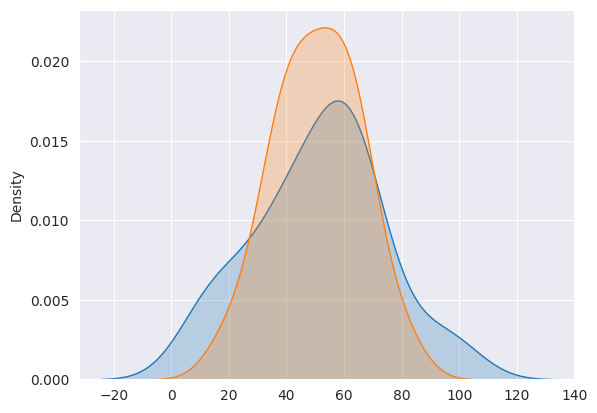

In [58]:
import random
import seaborn as sns

random.seed(100)
a = [ random.gauss(50,20) for x in range(30)]
b = [ random.gauss(55,15) for x in range(30)]
sns.set_style('darkgrid')
sns.kdeplot(a,fill=True)
sns.kdeplot(b,fill=True)

## Paired Sample T-Test (same population)

In [62]:
from scipy import stats

bp_before = np.array([143,263,153,153,146])
bp_after = np.array([153,170,168,142,141])
ttest,pval = stats.ttest_rel(bp_before,bp_after)
print(f'p-value:',pval)
print(f't-stat:',ttest)
if pval < 0.05: # a
 print(" we are rejecting null hypothesis")
else:
 print("we are accepting null hypothesis")

p-value: 0.44038504818092944
t-stat: 0.8557184392792647
we are accepting null hypothesis


## Independent Sample T-Test (unrelated groups)

In [60]:
random.seed(100)
a = [ random.gauss(50,20) for x in range(30)]
b = [ random.gauss(55,15) for x in range(30)]
t_stat, p_value = stats.ttest_ind(a,b,equal_var=False)
t_stat,p_value

(0.10279425917534266, 0.9185308294235142)

## Z-test

**Example:** A school principal claims that the students in his school are more intelligent than those of other schools. A random sample of 50 students'
IQ scores has a mean score of 110. The mean population IQ is 100 with an Standard deviation of 15. State whether the claim of the
principal is right or not at a 5% significance level.

Ho = the average population IQ score is 100

Ha = the average population IQ score is above 100

In [56]:
# import the libraries
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

mean_iq = 110
sd_iq = 15/math.sqrt(50)
alpha =0.05
null_mean =100
data = sd_iq*randn(50)+mean_iq
# Print mean and SD
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
if(p_value < alpha):
 print("Reject Null Hypothesis")
else:
 print("Fail to Reject NUll Hypothesis")

mean=110.20 stdv=2.28
Reject Null Hypothesis


## Chi-square Distribution
 * continuous probability distribution used to determine if there is a difference between observed results and expected results. 
 
 **add image**

[0.03656257 0.24707647 0.39121743 5.11064879 2.16118063 0.12791166
 0.03360491 0.33197162 0.30907121 0.01538305]


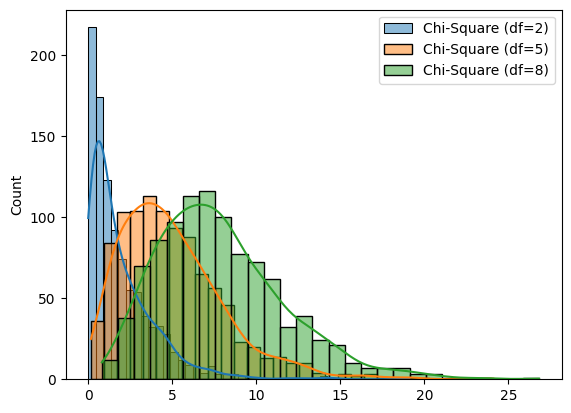

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Create Chi-Square Distribution of varying degrees of freedom
data_chi1 = np.random.chisquare(df = 2,size = 1000)
data_chi2 = np.random.chisquare(df = 5,size = 1000)
data_chi3 = np.random.chisquare(df = 8,size = 1000)
print(data1[:10])
# Plot the distributions
# Plot all three datasets in the same histplot
sns.histplot(data_chi1, kde=True, label='Chi-Square (df=2)')
sns.histplot(data_chi2, kde=True, label='Chi-Square (df=5)')
sns.histplot(data_chi3, kde=True, label='Chi-Square (df=8)')
plt.legend()

In [12]:
from scipy.stats import chi2_contingency
data = [[10,20,30],[6,9,17]]
stat, p_value, dof, chi_array = chi2_contingency(data)
p_value

0.873028283380073

###  Chi-square Test and Goodness-of-Fit
statistical hypothesis test used to determine whether a variable is likely to come from a specified distribution or not.

## Analysis of Variance or ANOVA
* Statistical method that separates observed variance data into different components to use for additional tests. 
*  A **one-way ANOVA** is used for three or more groups of data, to gain information about the relationship between the dependent and independent variables.
* The **two-way ANOVA** compares the mean differences between groups that have been split on two independent variables (called factors). The primary purpose of a two-way ANOVA is to understand if there is an interaction between the two independent variables on the dependent variable.It examines the effect of two different categorical independent variables or two independent factors on one continuous depedent variable.

### One-way ANOVA Example

In [16]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [18]:
from scipy.stats import f_oneway
grouped_data = [df['SalesInThousands'][df['MarketSize'] == size] for size in df['MarketSize'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between group means.")

F-Statistic: 268.9130229516844
P-Value: 5.633818717739858e-82
Reject the null hypothesis. There is a significant difference between group means.


### Refrences:
1- www.simplilearn.com

2- https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/